In [9]:
import numpy as np
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
#from scipy import optimize
from scipy import stats

In [10]:
dados = pd.read_csv('bank-full.csv', sep = ';')

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
#Ver missing values
dados.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [13]:
#Identificar se há null values no dataset
dados.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
#Identificar se há Nan values no dataset
dados.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
#Identificar possiveis valores duplicados no dataset
print(dados.duplicated().sum())

0


In [16]:
dados.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
dados.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Target Yes and No')

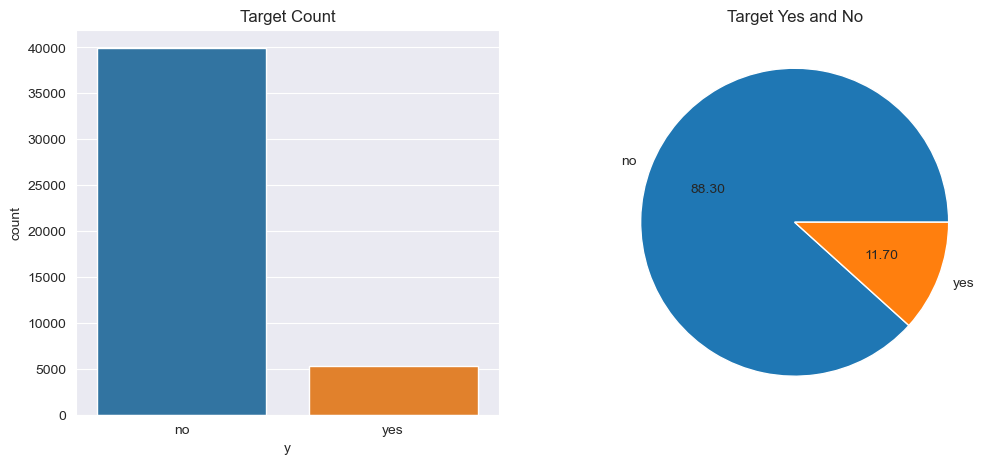

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='y')
plt.title('Target Count')
plt.subplot(1,2,2)
labels = dados['y'].value_counts(sort=True).index
sizes = dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

In [19]:
dados.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Emprego')

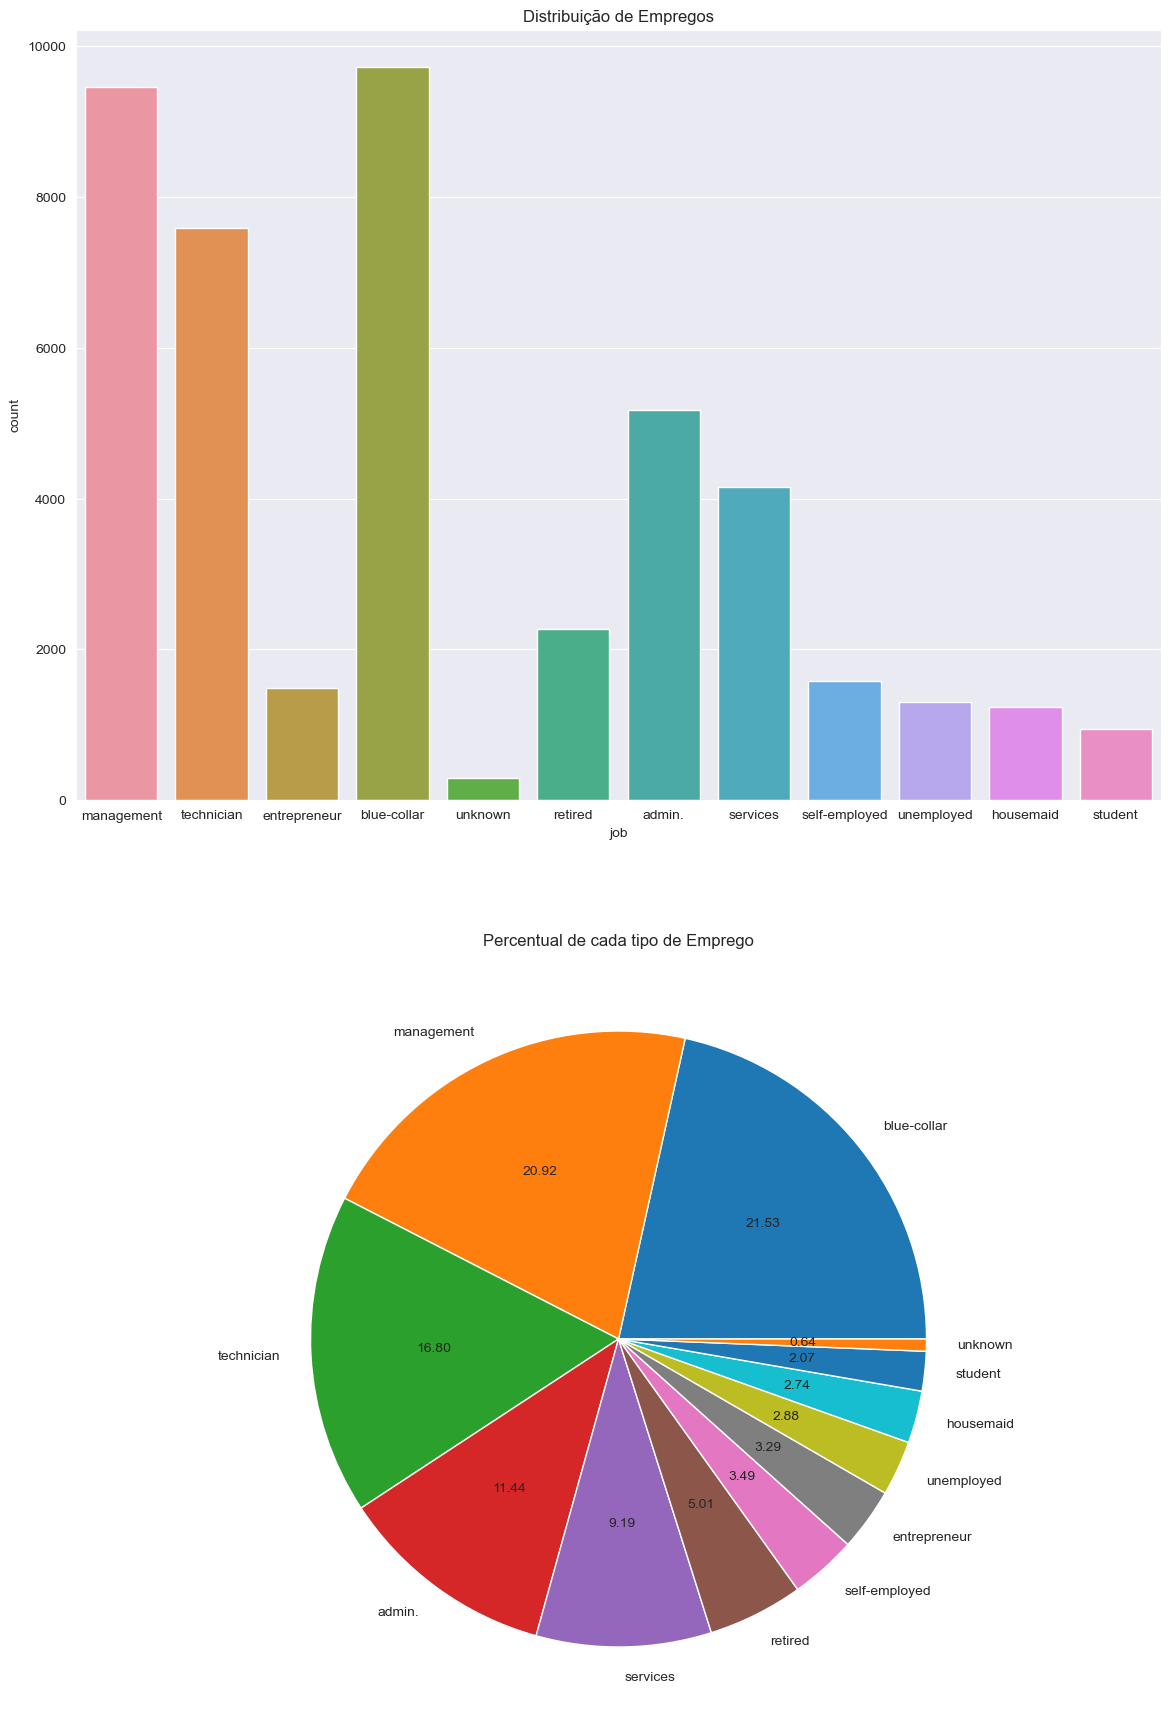

In [20]:
#Vizualizacao da distribuição de empregos plt pie e sea count plot
plt.figure(figsize = (14,22))
plt.subplot(2,1,1)
sea.countplot(data=dados, x='job')
plt.title('Distribuição de Empregos')
plt.subplot(2,1,2)
labels = dados['job'].value_counts(sort=True).index
sizes= dados['job'].value_counts(sort=True)
plt.pie(sizes,labels=labels, autopct='%.2f')
plt.title('Percentual de cada tipo de Emprego')

In [21]:
dados.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de estado civil')

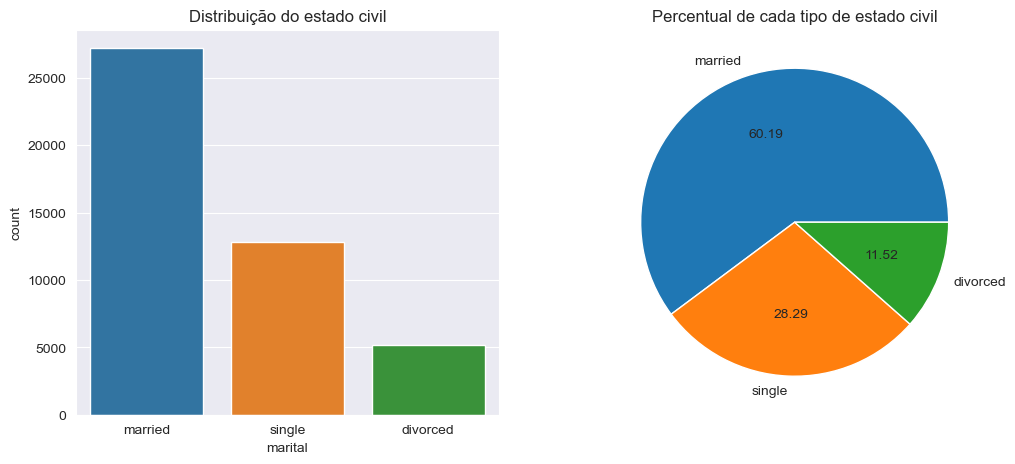

In [22]:
#Vizualizacao do estado civil plt pie e sea count plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='marital')
plt.title('Distribuição do estado civil')
plt.subplot(1,2,2)
labels=dados['marital'].value_counts(sort=True).index
sizes=dados['marital'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de estado civil')

In [23]:
dados.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Educação')

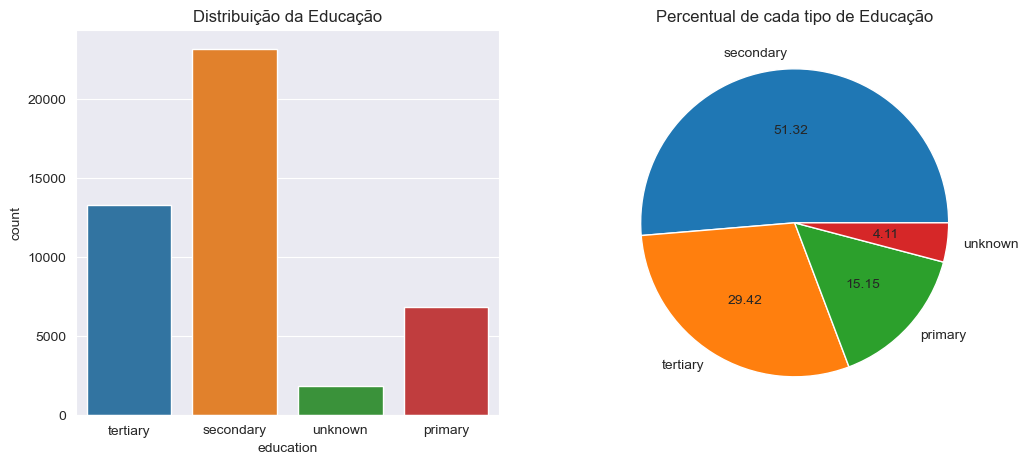

In [24]:
#Vizualizacao distribuicao da educação
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='education')
plt.title('Distribuição da Educação')
plt.subplot(1,2,2)
labels=dados['education'].value_counts(sort=True).index
sizes=dados['education'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de Educação')

In [25]:
dados.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Text(0.5, 1.0, 'Credito a habitaçao')

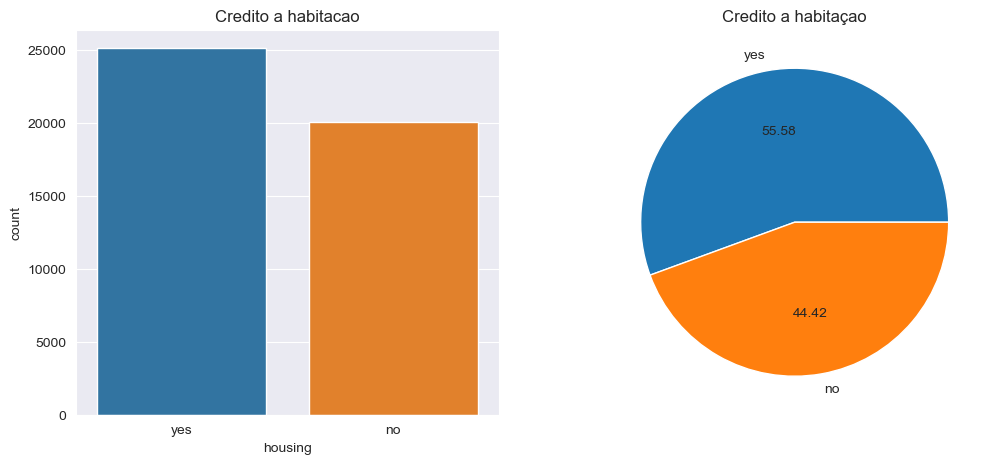

In [26]:
#Vizualizacao house loan plt pie
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='housing')
plt.title('Credito a habitacao')
plt.subplot(1,2,2)
labels=dados['housing'].value_counts(sort=True).index
sizes=dados['housing'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito a habitaçao')

In [27]:
dados.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Credito ao Consumo')

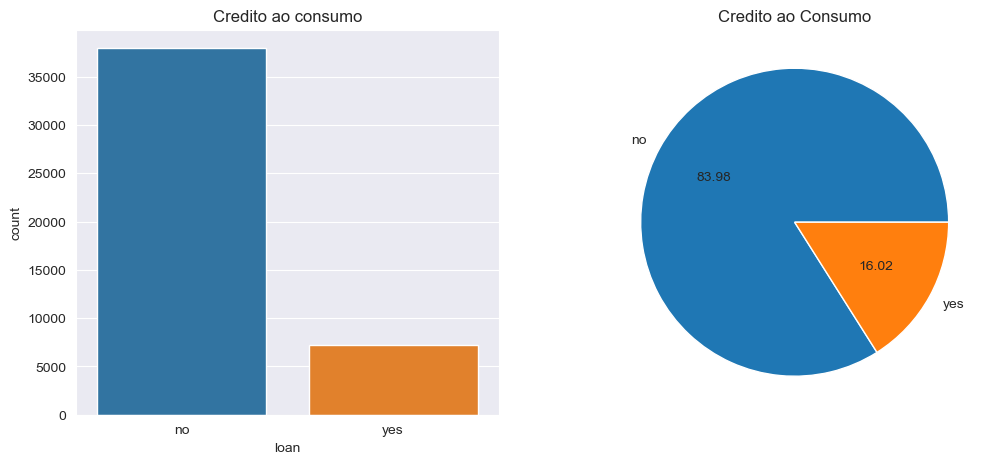

In [28]:
#Vizualizacao loan plt pie e seacount plt
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='loan')
plt.title('Credito ao consumo')
plt.subplot(1,2,2)
labels=dados['loan'].value_counts(sort=True).index
sizes=dados['loan'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito ao Consumo')

In [29]:
dados.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Tipo de contacto feito')

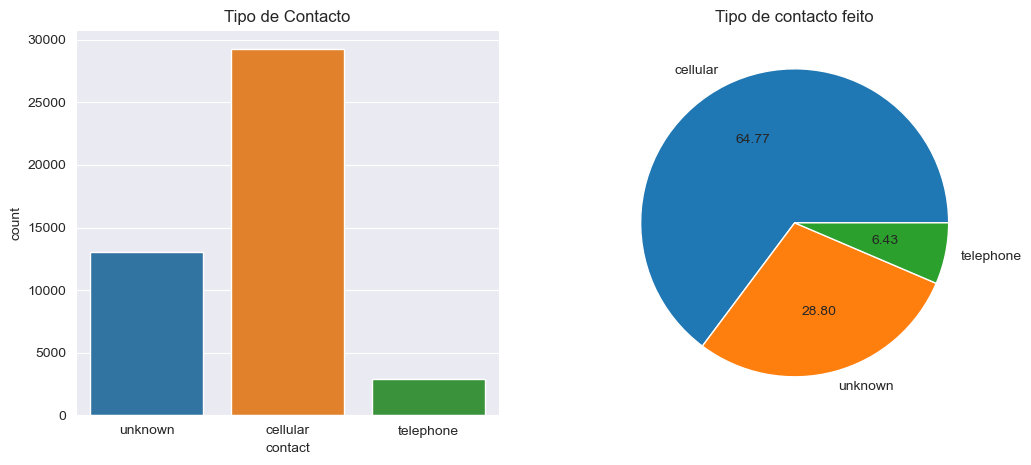

In [30]:
#Vizualizacao loan plt pie e seacount plt
##MUDAR AS CORES OU MUDAR A ORDEM DO X DO SEAPLT COUNT
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='contact')
plt.title('Tipo de Contacto')
plt.subplot(1,2,2)
labels=dados['contact'].value_counts(sort=True).index
sizes=dados['contact'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Tipo de contacto feito')

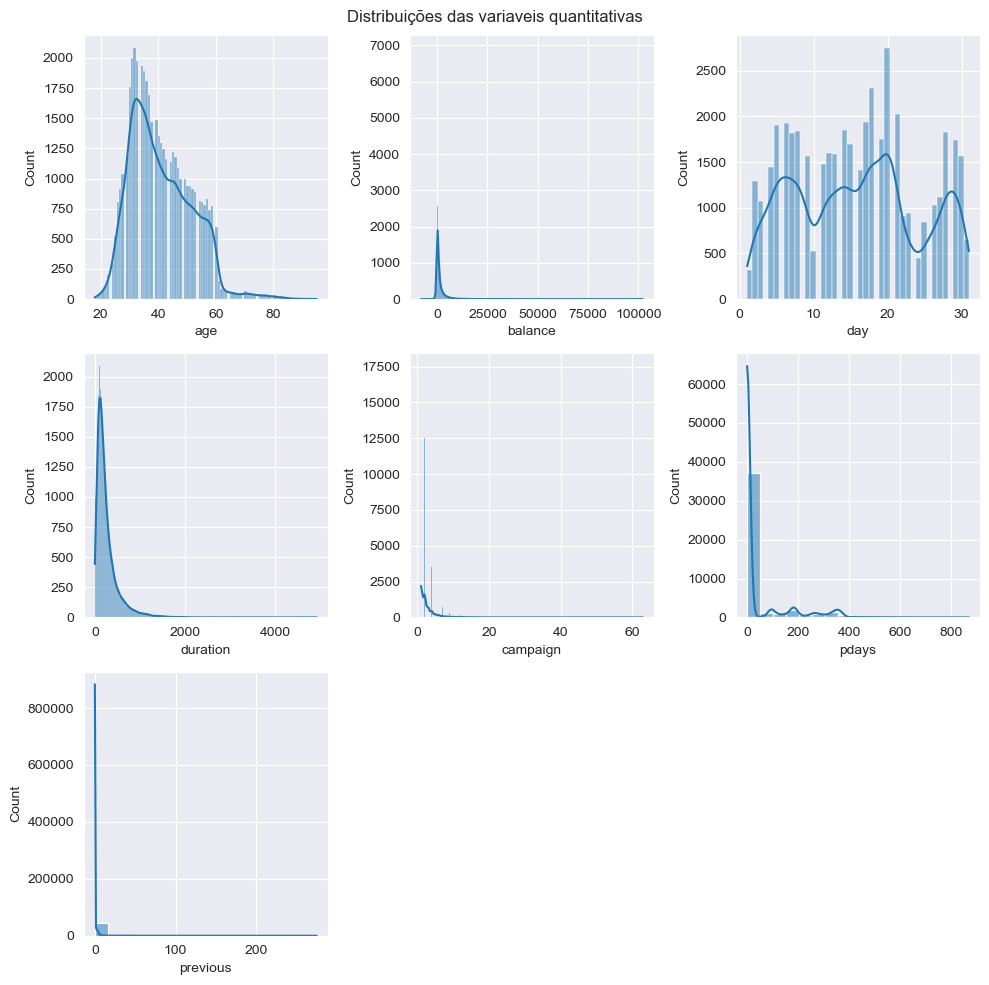

In [31]:
##Distribuicoes dos dados quatitativos
plt.figure(figsize=(10,10))

for i, col in enumerate(dados.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(3,3, i+1)
    sea.histplot(x = dados[col], ax=ax, kde = True)

plt.suptitle('Distribuições das variaveis quantitativas')
plt.tight_layout()

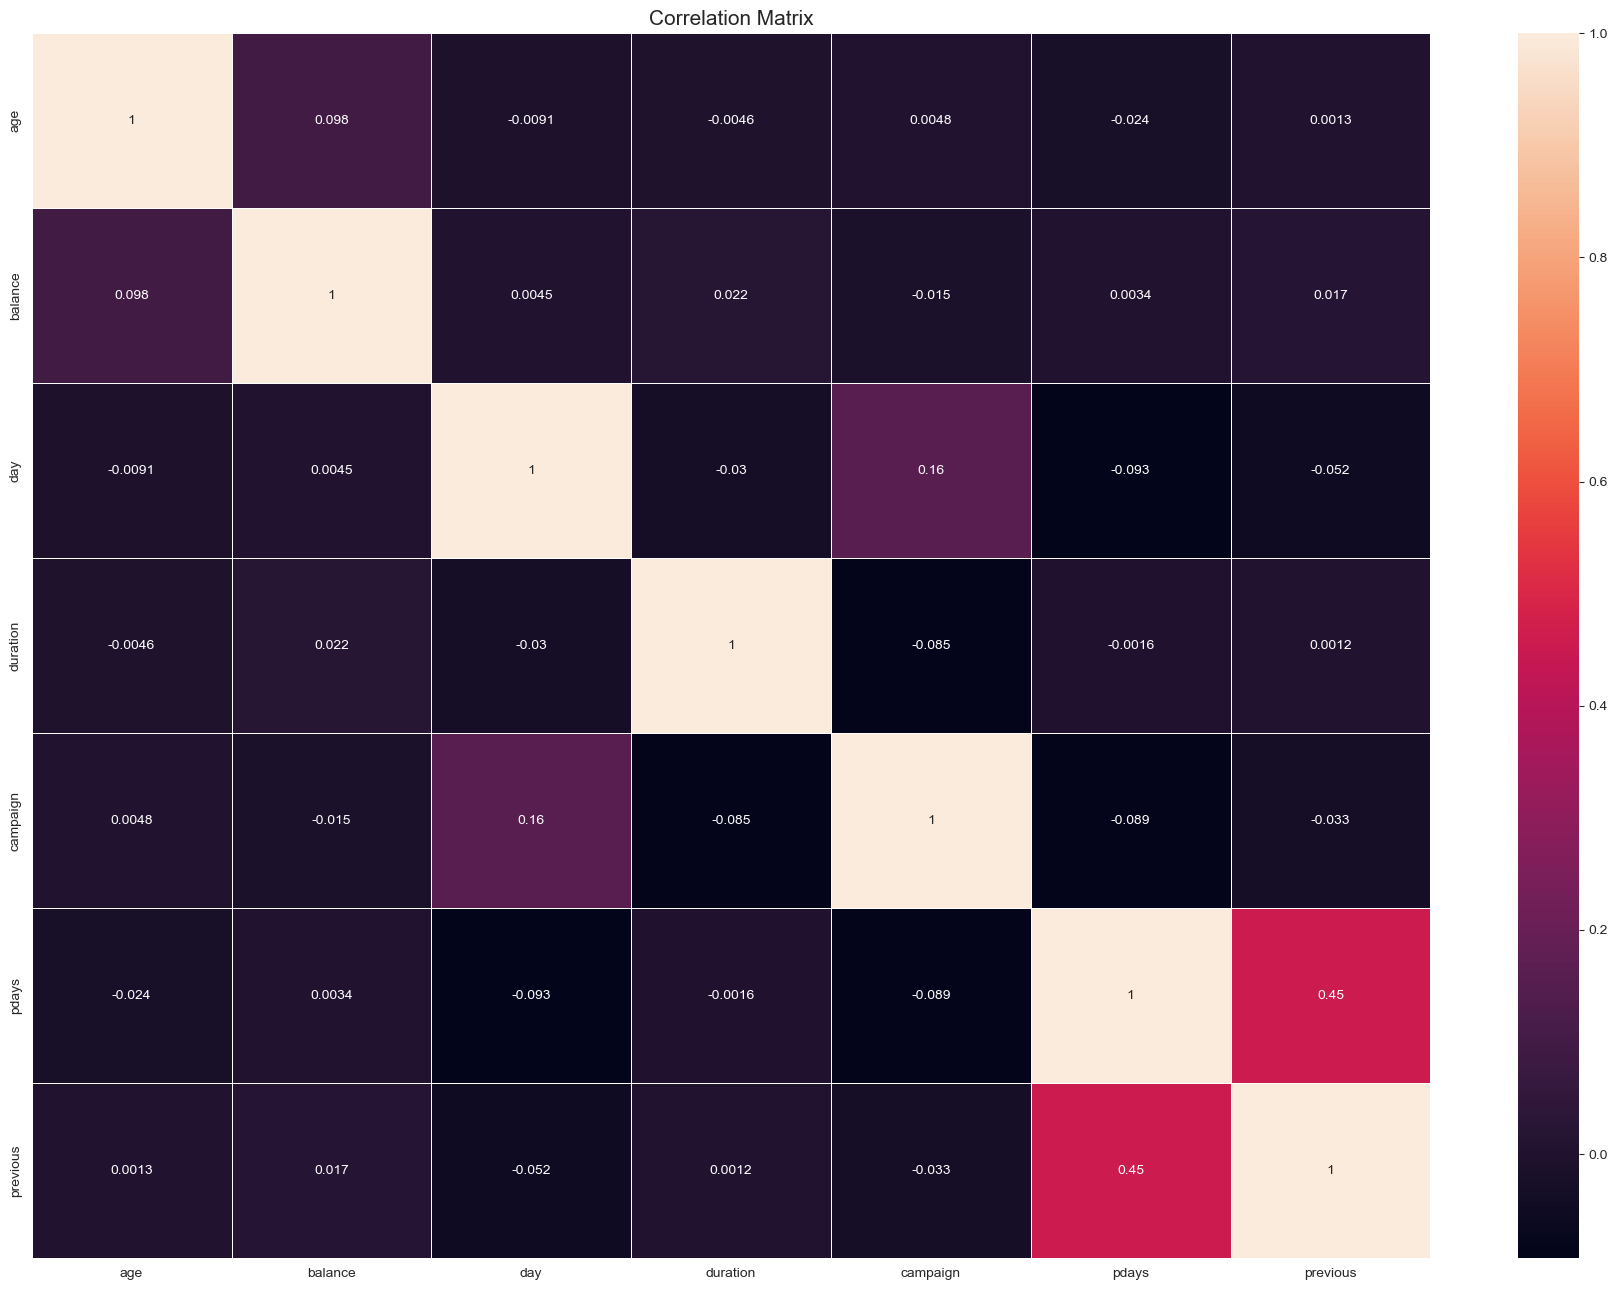

In [32]:
##Matrix de Correlação
plt.subplots(figsize = (18,13))
hmap = sea.heatmap(data = dados.corr(), annot=True , linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.tight_layout()

Text(0.5, 1.0, 'Distribuição do numero médio de contactos antes desta campanha para um cliente')

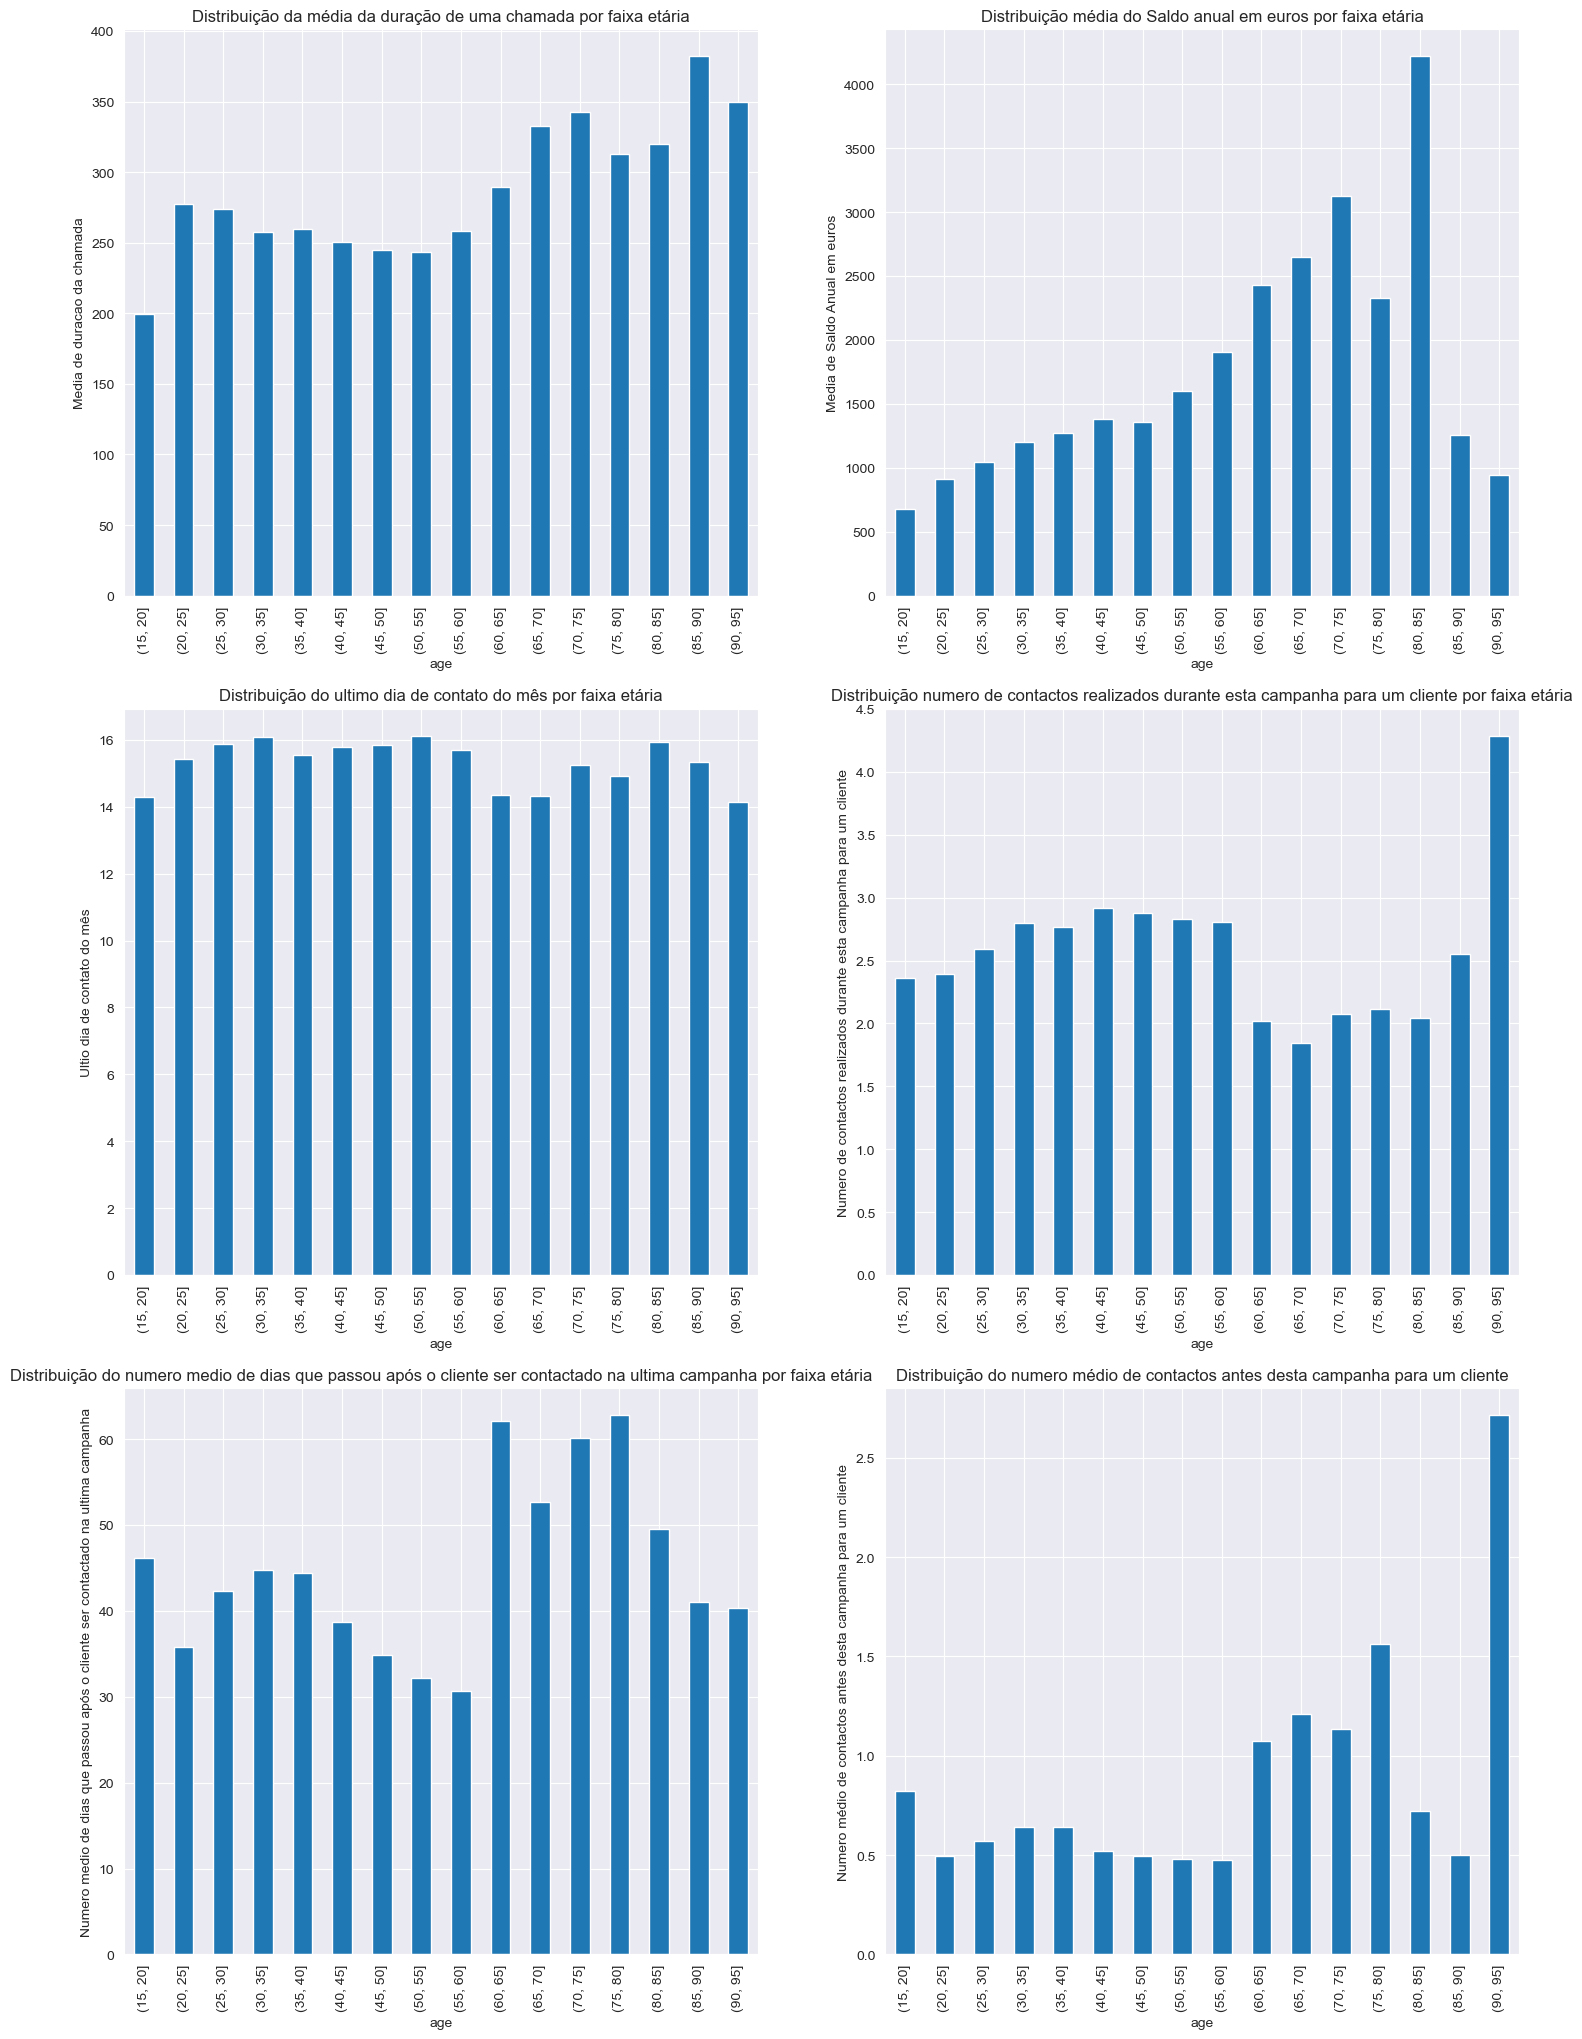

In [33]:
#Vizualização das variaveis numericas por faixa etária
#Vamos fazer distribuições de 5 em 5 anos
plt.figure(figsize=(18,25))
plt.subplot(3,2,1)
faixaidades=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
duracao_chamada_idades = dados.groupby(pd.cut(dados.age,faixaidades)).duration.mean().plot.bar()
plt.ylabel('Media de duracao da chamada')
plt.title('Distribuição da média da duração de uma chamada por faixa etária')
plt.subplot(3,2,2)
avg_balance_idades = dados.groupby(pd.cut(dados.age,faixaidades)).balance.mean().plot.bar()
plt.ylabel('Media de Saldo Anual em euros')
plt.title('Distribuição média do Saldo anual em euros por faixa etária')
plt.subplot(3,2,3)
##Ver melhor!!
last_day_month_contact_idades = dados.groupby(pd.cut(dados.age,faixaidades)).day.mean().plot.bar()
plt.ylabel('Ultio dia de contato do mês')
plt.title('Distribuição do ultimo dia de contato do mês por faixa etária')
plt.subplot(3,2,4)
campaign_contact_per_client_idades = dados.groupby(pd.cut(dados.age,faixaidades)).campaign.mean().plot.bar()
plt.ylabel('Numero de contactos realizados durante esta campanha para um cliente')
plt.title('Distribuição numero de contactos realizados durante esta campanha para um cliente por faixa etária')
plt.subplot(3,2,5)
campaign_contact_per_client_afterlastcampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).pdays.mean().plot.bar()
plt.ylabel('Numero medio de dias que passou após o cliente ser contactado na ultima campanha')
plt.title('Distribuição do numero medio de dias que passou após o cliente ser contactado na ultima campanha por faixa etária')
plt.subplot(3,2,6)
number_contacts_beforethiscampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).previous.mean().plot.bar()
plt.ylabel('Numero médio de contactos antes desta campanha para um cliente')
plt.title('Distribuição do numero médio de contactos antes desta campanha para um cliente')

In [34]:
##FAZER BOXPLOTING PARA VER OS OUTLINERS
